<a href="https://colab.research.google.com/github/Naman-Kapoor26/BALL-BEARING-FAULT-DETECTION/blob/main/Fault_Detection_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
#Importing dependencies
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [16]:
!git clone https://github.com/Naman-Kapoor26/BALL-BEARING-FAULT-DETECTION.git

fatal: destination path 'BALL-BEARING-FAULT-DETECTION' already exists and is not an empty directory.


In [17]:
subdir_path = '/content/BALL-BEARING-FAULT-DETECTION/Labelled Images' 

In [18]:
fault_type=[]
for file_name in os.listdir(subdir_path):
  file_path=subdir_path+'/'+file_name
  if file_path.endswith('.npy'):
    fault_type.append(file_name[:-4])

In [19]:
len(fault_type)

10

In [20]:
imgs=[]
imgs_label=[]
for file_name in os.listdir(subdir_path):
  file_path=subdir_path+'/'+file_name
  if file_path.endswith('.npy'):
    image_bunch=np.load(file_path)
    for i in range(len(image_bunch)):
      imgs.append(image_bunch[i]) #images
      imgs_label.append(fault_type.index(file_name[:-4])) #encoding fault_labels



In [21]:
#Splitting dataset 
X=np.array(imgs)
y=np.array(imgs_label)

from sklearn.model_selection import train_test_split
train_data, test_data, train_labels, test_labels = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)


In [22]:
# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [23]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 60, 60, 32)        832       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 12, 12, 64)        36928     
                                                                 
 flatten_1 (Flatten)         (None, 9216)             

In [24]:
#Function for plotting metrics for each fold
 def plotmodelhistory(history): 
    fig, axs = plt.subplots(1,2,figsize=(15,5)) 
    # summarize history for accuracy
    axs[0].plot(history.history['accuracy']) 
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy') 
    axs[0].set_xlabel('Epoch')
    
    axs[0].legend(['train', 'validate'], loc='upper left')
    # summarize history for loss
    axs[1].plot(history.history['loss'])  
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss') 
    axs[1].set_xlabel('Epoch')
    axs[1].legend(['train', 'validate'], loc='upper left')
    plt.show()

Epoch 1/20
55/55 [==============================] - 13s 206ms/step - loss: 1.8820 - accuracy: 0.3305
Epoch 2/20
55/55 [==============================] - 11s 204ms/step - loss: 1.4465 - accuracy: 0.4483
Epoch 3/20
55/55 [==============================] - 10s 186ms/step - loss: 1.2063 - accuracy: 0.5111
Epoch 4/20
55/55 [==============================] - 11s 199ms/step - loss: 1.1109 - accuracy: 0.5517
Epoch 5/20
55/55 [==============================] - 11s 208ms/step - loss: 1.0211 - accuracy: 0.5992
Epoch 6/20
55/55 [==============================] - 11s 208ms/step - loss: 0.9662 - accuracy: 0.6238
Epoch 7/20
55/55 [==============================] - 11s 205ms/step - loss: 0.9392 - accuracy: 0.6198
Epoch 8/20
55/55 [==============================] - 11s 197ms/step - loss: 0.7909 - accuracy: 0.6730
Epoch 9/20
55/55 [==============================] - 11s 197ms/step - loss: 0.7513 - accuracy: 0.7050
Epoch 10/20
55/55 [==============================] - 10s 183ms/step - loss: 0.7569 - accura

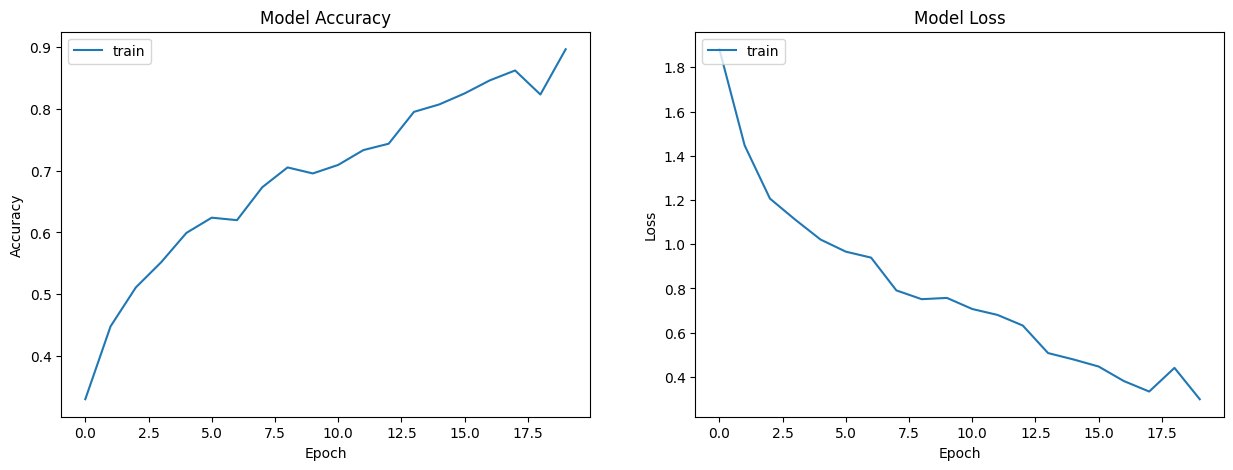


Epoch 1/20
55/55 [==============================] - 11s 202ms/step - loss: 0.2625 - accuracy: 0.8994
Epoch 2/20
55/55 [==============================] - 11s 200ms/step - loss: 0.2551 - accuracy: 0.9051
Epoch 3/20
55/55 [==============================] - 10s 176ms/step - loss: 0.3010 - accuracy: 0.8919
Epoch 4/20
55/55 [==============================] - 11s 199ms/step - loss: 0.3634 - accuracy: 0.8794
Epoch 5/20
55/55 [==============================] - 11s 203ms/step - loss: 0.1580 - accuracy: 0.9474
Epoch 6/20
55/55 [==============================] - 11s 209ms/step - loss: 0.1919 - accuracy: 0.9394
Epoch 7/20
55/55 [==============================] - 11s 202ms/step - loss: 0.1143 - accuracy: 0.9611
Epoch 8/20
55/55 [==============================] - 11s 205ms/step - loss: 0.0744 - accuracy: 0.9794
Epoch 9/20
55/55 [==============================] - 11s 197ms/step - loss: 0.0648 - accuracy: 0.9834
Epoch 10/20
55/55 [==============================] - 10s 178ms/step - loss: 0.2387 - accur

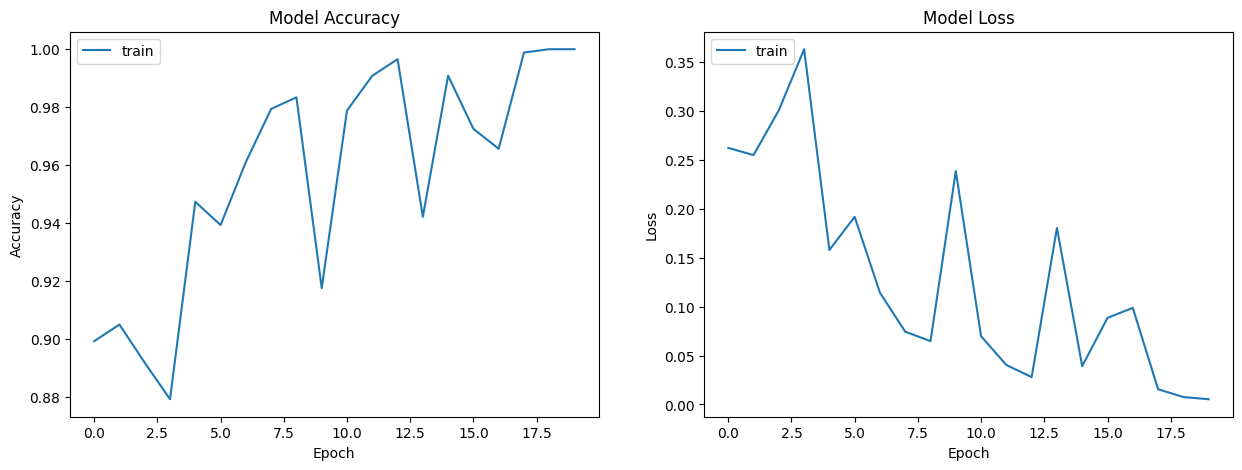


Epoch 1/20
55/55 [==============================] - 10s 179ms/step - loss: 0.0895 - accuracy: 0.9657
Epoch 2/20
55/55 [==============================] - 11s 201ms/step - loss: 0.0932 - accuracy: 0.9737
Epoch 3/20
55/55 [==============================] - 11s 207ms/step - loss: 0.0868 - accuracy: 0.9703
Epoch 4/20
55/55 [==============================] - 11s 204ms/step - loss: 0.0296 - accuracy: 0.9897
Epoch 5/20
55/55 [==============================] - 11s 205ms/step - loss: 0.0311 - accuracy: 0.9897
Epoch 6/20
55/55 [==============================] - 11s 205ms/step - loss: 0.1519 - accuracy: 0.9451
Epoch 7/20
55/55 [==============================] - 11s 207ms/step - loss: 0.0277 - accuracy: 0.9943
Epoch 8/20
55/55 [==============================] - 10s 183ms/step - loss: 0.0101 - accuracy: 0.9989
Epoch 9/20
55/55 [==============================] - 11s 199ms/step - loss: 0.0544 - accuracy: 0.9777
Epoch 10/20
55/55 [==============================] - 11s 205ms/step - loss: 0.0150 - accur

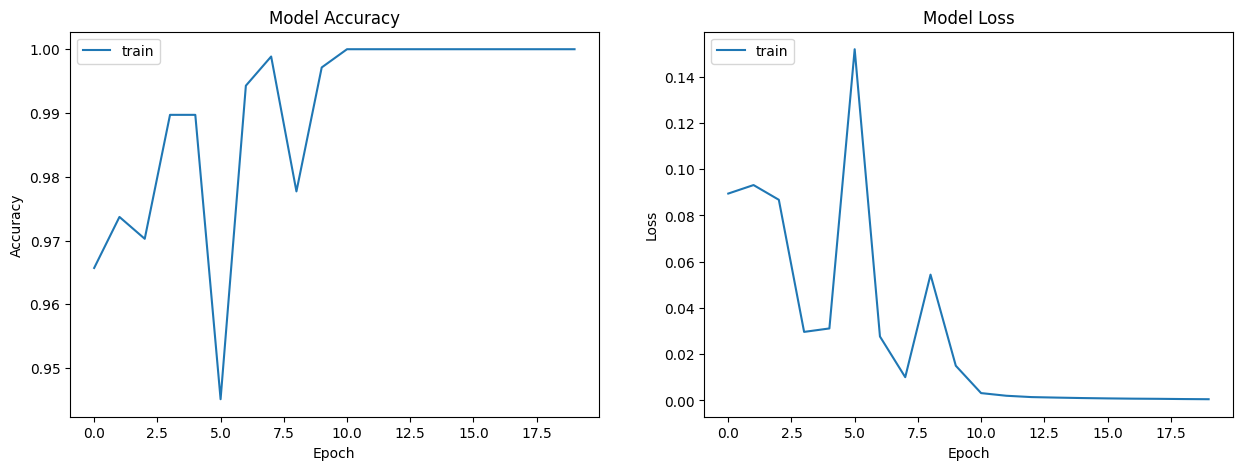


Epoch 1/20
55/55 [==============================] - 11s 207ms/step - loss: 0.0022 - accuracy: 0.9994
Epoch 2/20
55/55 [==============================] - 11s 209ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 3/20
55/55 [==============================] - 11s 208ms/step - loss: 7.3534e-04 - accuracy: 1.0000
Epoch 4/20
55/55 [==============================] - 11s 209ms/step - loss: 6.2749e-04 - accuracy: 1.0000
Epoch 5/20
55/55 [==============================] - 13s 238ms/step - loss: 4.8833e-04 - accuracy: 1.0000
Epoch 6/20
55/55 [==============================] - 11s 206ms/step - loss: 4.3685e-04 - accuracy: 1.0000
Epoch 7/20
55/55 [==============================] - 11s 192ms/step - loss: 4.1380e-04 - accuracy: 1.0000
Epoch 8/20
55/55 [==============================] - 11s 196ms/step - loss: 3.4559e-04 - accuracy: 1.0000
Epoch 9/20
55/55 [==============================] - 12s 211ms/step - loss: 3.0151e-04 - accuracy: 1.0000
Epoch 10/20
55/55 [==============================] - 12s 211ms

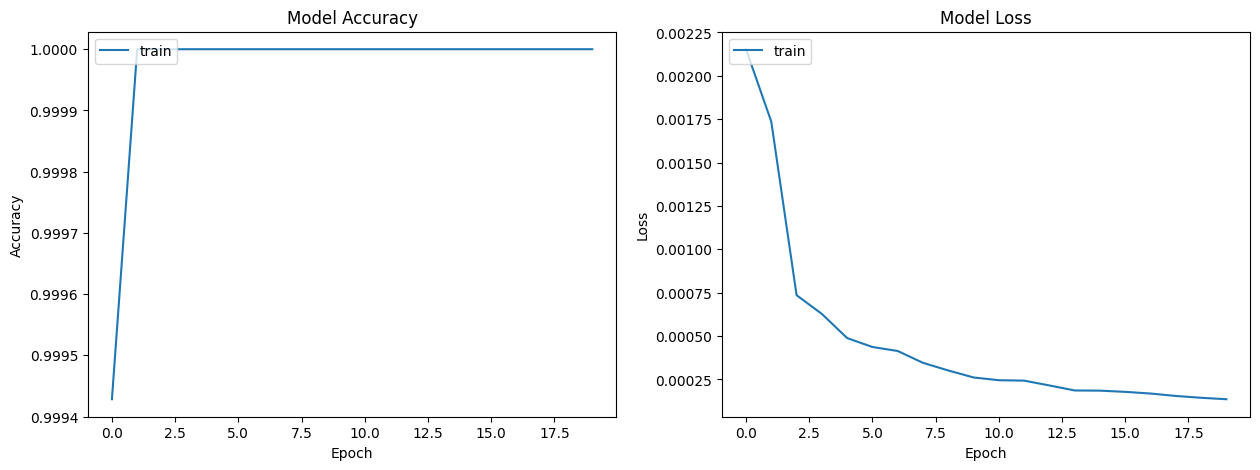

In [25]:
#In cases where classes are imbalanced we need a way to account for the imbalance in both the train and validation sets.
# To do so we can stratify the target classes, meaning that both sets will have an equal proportion of all classes.
from sklearn.model_selection import StratifiedKFold
k_fold = StratifiedKFold(n_splits=4, random_state=12, shuffle=True)

for k_train_index, k_test_index in k_fold.split(train_data, train_labels):
    history=model.fit(train_data[k_train_index,:], train_labels[k_train_index],epochs=20)
    plotmodelhistory(history)

    print('')


In [26]:
trainPredictions=model.predict(train_data)

73/73 [==============================] - 3s 46ms/step


In [27]:
testPredictions=model.predict(test_data)

19/19 [==============================] - 1s 43ms/step


In [28]:
testy_pred=[]
for i in testPredictions:
  testy_pred.append(np.argmax(i))

trainy_pred=[]
for i in trainPredictions:
  trainy_pred.append(np.argmax(i))

In [29]:
test_confu_matrix = confusion_matrix(test_labels,testy_pred)
train_confu_matrix = confusion_matrix(train_labels,trainy_pred)

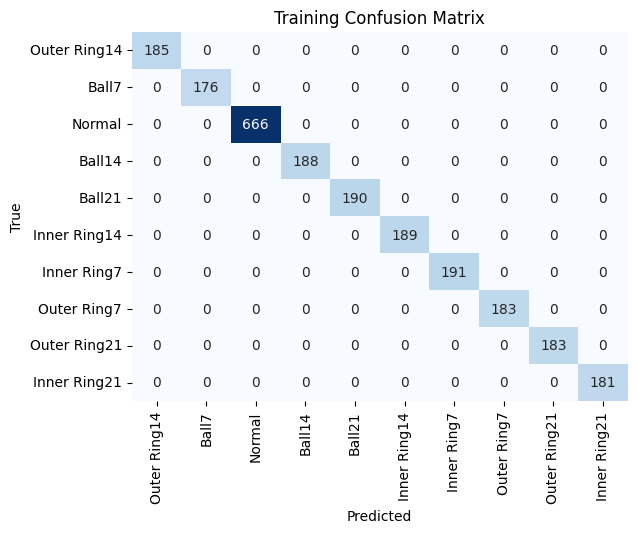

In [30]:
sns.heatmap(train_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Training Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

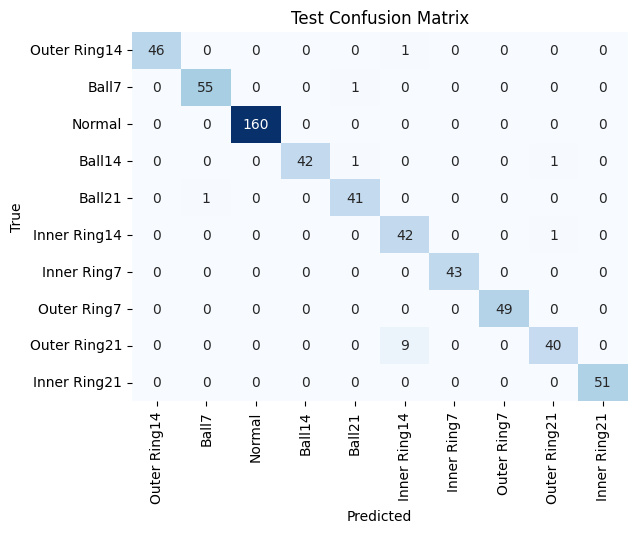

In [31]:
sns.heatmap(test_confu_matrix, annot= True,fmt = "d",
xticklabels=fault_type, yticklabels=fault_type, cmap = "Blues", cbar = False)
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [32]:
model.evaluate(test_data, test_labels)

19/19 [==============================] - 1s 45ms/step - loss: 0.1013 - accuracy: 0.9743


[0.1012747585773468, 0.9743150472640991]

In [33]:
model.save('CNNFaultDetection.h5')